In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv('Training.csv')


# 'fluid_overload' 都為0，Unnamed: 133 都 NA
data = data.drop(['fluid_overload','Unnamed: 133'],axis=1)

#刪除 相關係數=1.0
data = data.drop(['throat_irritation','redness_of_eyes','sinus_pressure','runny_nose','enlarged_thyroid','enlarged_thyroid',
                  'brittle_nails','congestion','increased_appetite','receiving_blood_transfusion','coma','slurred_speech']
                 ,axis=1)
#刪除 相關係數=0.9
data = data.drop(['weight_gain','pain_during_bowel_movements','pain_in_anal_region','bloody_stool','cramps','bruising','swollen_legs',
                 'cold_hands_and_feets','puffy_face_and_eyes','anxiety','knee_pain','spinning_movements','bladder_discomfort',
                  'passage_of_gases','weakness_of_one_body_side','toxic_look_(typhos)','mood_swings','irregular_sugar_level',
                  'yellow_urine','acute_liver_failure','swelling_of_stomach','distention_of_abdomen', 'history_of_alcohol_consumption',
                  'blister','red_sore_around_nose','small_dents_in_nails','silver_like_dusting','swollen_blood_vessels',
                  'drying_and_tingling_lips','swelling_joints','skin_peeling'],axis=1)
#刪除 0.9 以上
data = data.drop(['patches_in_throat','foul_smell_of urine','blackheads'],axis=1)

#sum()
data = data.drop(['pus_filled_pimples','unsteadiness','chest_pain','vomiting'],axis=1)
data_l = data
X=data_l.drop(['prognosis'],axis=1)
y=data_l['prognosis']

In [21]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,receiving_unsterile_injections,stomach_bleeding,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,scurring,inflammatory_nails,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
test=pd.DataFrame()
for i in set(data['prognosis']):
    data1=data[data['prognosis']==i].sample(n=36)
    test=pd.concat([test,data1],axis=0)
test=test.sample(n=1476)
data=data.drop(test.index,axis=0)
X_test=test.drop(['prognosis'],axis=1)
y_test=test['prognosis']
X_train=data.drop(['prognosis'],axis=1)
y_train=data['prognosis']

In [17]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# # 假設X是你的特徵矩陣，y_encoded是編碼後的目標變量
# X = data.drop('prognosis', axis=1)  # 'target'是目標變量列名，如果不同請更改
# y = data['prognosis']

# # 初始化LabelEncoder
# label_encoder = LabelEncoder()

# # 擬合並轉換目標變量
# y_encoded = label_encoder.fit_transform(y)
# data['y_encoded']=y_encoded
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.naive_bayes import BernoulliNB    
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score
import time
time1=time.time()

model=BernoulliNB()                         
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')                          # 因是多分類須加參數 'weighted' 
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("伯努力貝氏分類:")
print("Accuracy :{}".format(accuracy))
print("Precision:{}".format(precision))
print("Recall   :{}".format(recall))
print("F1-Score :{}".format(f1))
time2=time.time()
time3=time2-time1
print(time3)

伯努力貝氏分類:
Accuracy :1.0
Precision:1.0
Recall   :1.0
F1-Score :1.0
0.13021516799926758


In [8]:
from sklearn.metrics import classification_report
y_pred =model.predict(X_test)
print(classification_report(y_test,y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        36
                                   AIDS       1.00      1.00      1.00        36
                                   Acne       1.00      1.00      1.00        36
                    Alcoholic hepatitis       1.00      1.00      1.00        36
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        36
                       Bronchial Asthma       1.00      1.00      1.00        36
                   Cervical spondylosis       1.00      1.00      1.00        36
                            Chicken pox       1.00      1.00      1.00        36
                    Chronic cholestasis       1.00      1.00      1.00        36
                            Common Cold       1.00      1.00      1.00        36
                           

In [24]:
import numpy as np
from sklearn.model_selection import learning_curve

size = np.linspace(.1, 1.0, 10)
train_sizes, train_scores, valid_scores = \
    learning_curve(estimator=model,
                   X=X, y=y,
                   train_sizes=size,
                   cv=10, n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

最大平均值 : 1.0
所需的訓練樣本 : 1328


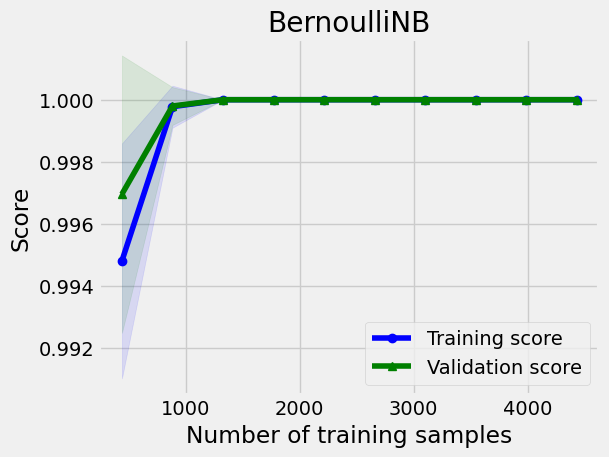

In [25]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.plot(train_sizes, train_scores_mean, 
         color='blue', marker='o', 
         label='Training score')
plt.fill_between(train_sizes, 
                 train_scores_mean+train_scores_std, 
                 train_scores_mean-train_scores_std, 
                 color='blue', alpha=.1)
plt.plot(train_sizes, valid_scores_mean, 
         color='green', marker='^', 
         label='Validation score')
plt.fill_between(train_sizes, 
                 valid_scores_mean+valid_scores_std, 
                 valid_scores_mean-valid_scores_std, 
                 color='green', alpha=.1)
plt.title('BernoulliNB')
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.tight_layout()
max_valid_score_index = np.argmax(valid_scores_mean)
max_valid_score = valid_scores_mean[max_valid_score_index]

# 獲取對應的訓練集大小
optimal_train_size = train_sizes[max_valid_score_index]

# 打印結果
print(f"最大平均值 : {max_valid_score}")
print(f"所需的訓練樣本 : {optimal_train_size}")

In [26]:
max_valid_score_index = np.argmax(valid_scores_mean)
max_valid_score = valid_scores_mean[max_valid_score_index]

# 獲取對應的訓練集大小
optimal_train_size = train_sizes[max_valid_score_index]

# 打印結果
print(f"最大平均值 : {max_valid_score}")
print(f"所需的訓練樣本 : {optimal_train_size}")

最大平均值 : 1.0
所需的訓練樣本 : 1328


In [27]:
valid_scores_mean.shape

(10,)

2